# 1. Import Libraries

In [1]:
#data wrangling
import numpy as np
import pandas as pd

In [2]:
#sklearn
from sklearn.model_selection import train_test_split
#Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# 2.  Data Acquisition

#### Train Data set

In [3]:
train_data = pd.read_csv("/Users/rynadalswyd/Documents/LEARN/Level 9/IT351/project/train.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Test Data set

In [4]:
test_data = pd.read_csv("/Users/rynadalswyd/Documents/LEARN/Level 9/IT351/project/test.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# 3. Exploratory Analysis

#### Train Data set

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Graphical Techniques 

<AxesSubplot:>

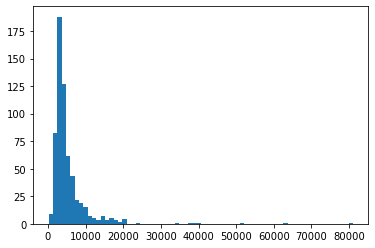

In [7]:
train_data['ApplicantIncome'].hist(bins=70,grid=False)

<AxesSubplot:>

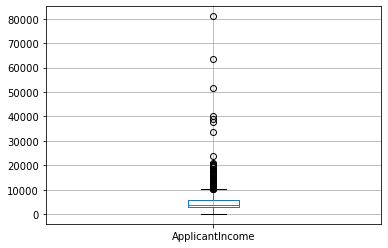

In [8]:
train_data.boxplot(column = 'ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

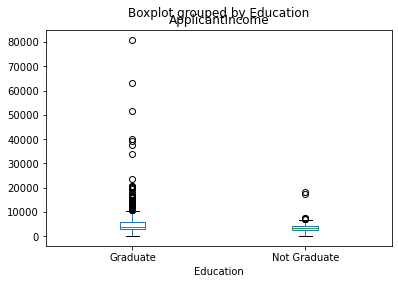

In [9]:
train_data.boxplot(column = 'ApplicantIncome', grid =False, by = 'Education')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

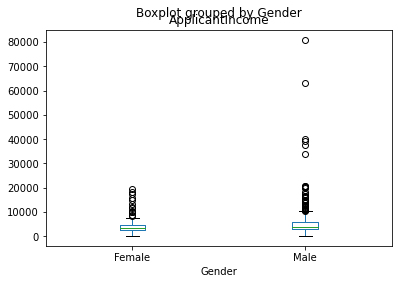

In [10]:
train_data.boxplot(column = 'ApplicantIncome', grid =False, by = 'Gender')

<AxesSubplot:>

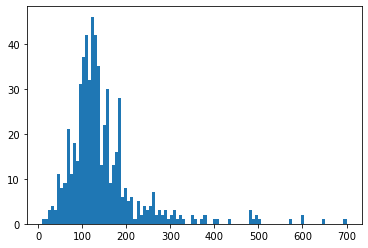

In [11]:
train_data['LoanAmount'].hist(bins=100,grid = False)

<AxesSubplot:>

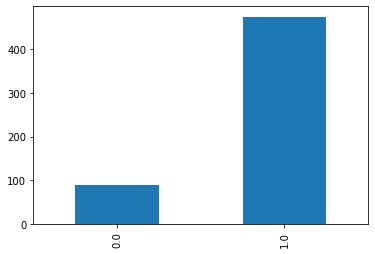

In [12]:
temp = train_data['Credit_History'].value_counts(ascending = True)
temp.plot(kind = 'bar')

#### Test Data set

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [14]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# 4. Process/Clean Data

### Train Data set

#### 1: Handle missing values 

In [15]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

In [17]:
train_data['Self_Employed'].fillna('No',inplace=True)

In [18]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [19]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 2: Lable Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
train_data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### Test Data set

#### 1: Handle missing values 

In [21]:
test_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [22]:
test_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

In [23]:
test_data['Self_Employed'].fillna('No',inplace=True)

In [24]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

In [25]:
test_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### 2: Lable Encoding

In [26]:
var_mod_test = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in var_mod_test:
    test_data[i] = le.fit_transform(test_data[i])
test_data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


# 5. Model Generation & Validation 


In [27]:
X_train= train_data[['Credit_History','Gender','Married','Education']]
y_train = train_data['Loan_Status']

Test= test_data[['Credit_History','Gender','Married','Education']]


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 3)
print("X_train = ",len(X_train),"\nX_test=",len(X_test))

X_train =  429 
X_test= 185


### Decision Tree

In [29]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict_DT = DT.predict(X_test)

In [30]:
DT_SC = accuracy_score(predict_DT,y_test)
print(classification_report(y_test, predict_DT))
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        45
           1       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185

85.41% Accurate


### Logistic Regression

In [31]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
predict_LR = LR.predict(X_test)

In [32]:
LR_SC = accuracy_score(predict_LR,y_test)
print(classification_report(y_test, predict_LR))
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        45
           1       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185

85.41% Accurate


### Random Forest

In [33]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)

In [34]:
RF_SC = accuracy_score(y_test,predict_RF)
print(classification_report(y_test, predict_RF))
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        45
           1       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185

85.41% Accurate


In [35]:
test_data['Loan_Status'] = RF.predict(Test)
test_data['Loan_Status'].value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64

In [36]:
test_data.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,1
6,LP001055,0,0,1,1,0,2226,0,59.0,360.0,1.0,1,1
7,LP001056,1,1,2,1,0,3881,0,147.0,360.0,0.0,0,0
8,LP001059,1,1,2,0,0,13633,0,280.0,240.0,1.0,2,1
9,LP001067,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1,1
